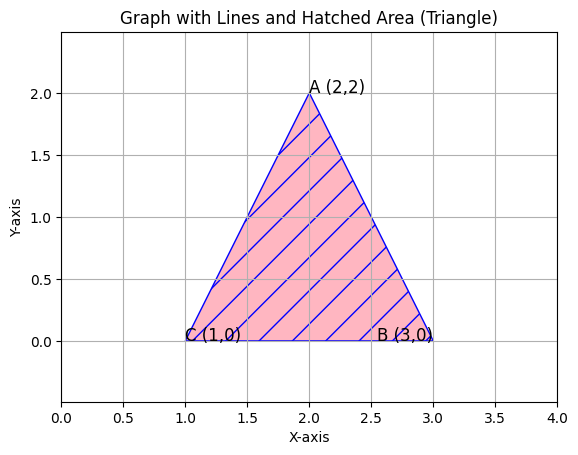

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the triangle
vertices = np.array([[1, 0], [3, 0], [2, 2]])

# Create a polygon based on the vertices
triangle = plt.Polygon(vertices, closed=True, fill=True, edgecolor='blue', facecolor='#FFB6C1', hatch='/', label='Area Inside Triangle')

# Create the plot
fig, ax = plt.subplots()

# Add the triangle to the plot
ax.add_patch(triangle)

# Set the labels for vertices
for (x, y), label in zip(vertices, ['C (1,0)', 'B (3,0)', 'A (2,2)']):
    ax.text(x, y, label, fontsize=12, ha='right' if x>2 else 'left')

# Set limits, grid and labels
ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)
ax.set_aspect('equal', adjustable='datalim')
plt.grid(True)
ax.set_title('Graph with Lines and Hatched Area (Triangle)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()


In [2]:
import numpy as np
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [3]:
#define model for dataset
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([2, 1], 6)
  neur2 = McCulloch_Pitts_neuron([0, 1], 0)
  neur3 = McCulloch_Pitts_neuron([-2, 1], -2)
  neur5 = McCulloch_Pitts_neuron([-1, 3, -1], 2.5)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur5.model(np.array([z1, z2, z3]))

  return list([z4])

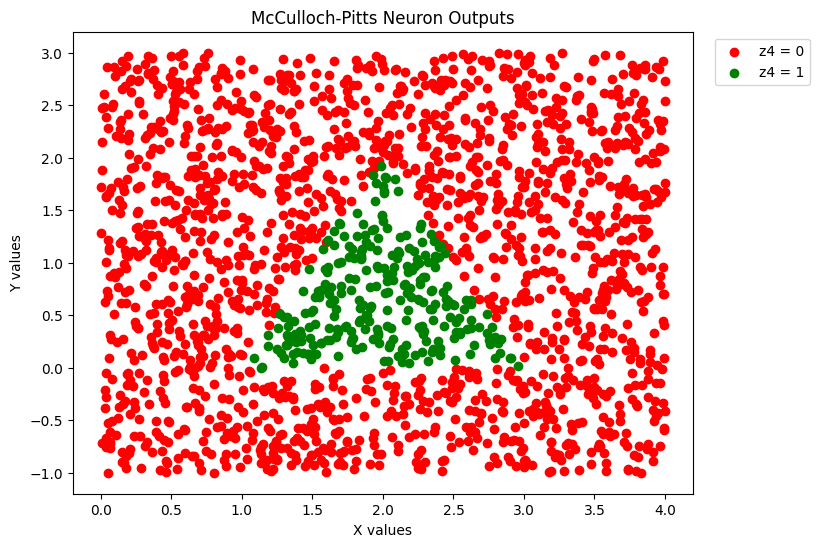

In [4]:
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 3, num_points)  # Updated y-axis limits
# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts neuron with different activation functions
class McCulloch_Pitts_neuron():

    def __init__(self, weights, activation='threshold', threshold=0):
        self.weights = np.array(weights)
        self.activation = activation
        self.threshold = threshold

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def model(self, x):
        linear_output = self.weights @ x
        if self.activation == 'threshold':
            return 1 if linear_output >= self.threshold else 0
        elif self.activation == 'sigmoid':
            return self.sigmoid(linear_output)
        elif self.activation == 'tanh':
            return self.tanh(linear_output)
        elif self.activation == 'relu':
            return self.relu(linear_output)
        else:
            raise ValueError("Unsupported activation function")

# Define model for dataset
def Area(x, y, activation='threshold'):
    neur1 = McCulloch_Pitts_neuron([2, 1], activation=activation, threshold=6)
    neur2 = McCulloch_Pitts_neuron([0, 1], activation=activation, threshold=0)
    neur3 = McCulloch_Pitts_neuron([-2, 1], activation=activation, threshold=-2)
    neur5 = McCulloch_Pitts_neuron([-1, 3, -1], activation=activation, threshold=2.5)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur5.model(np.array([z1, z2, z3]))

    return z4


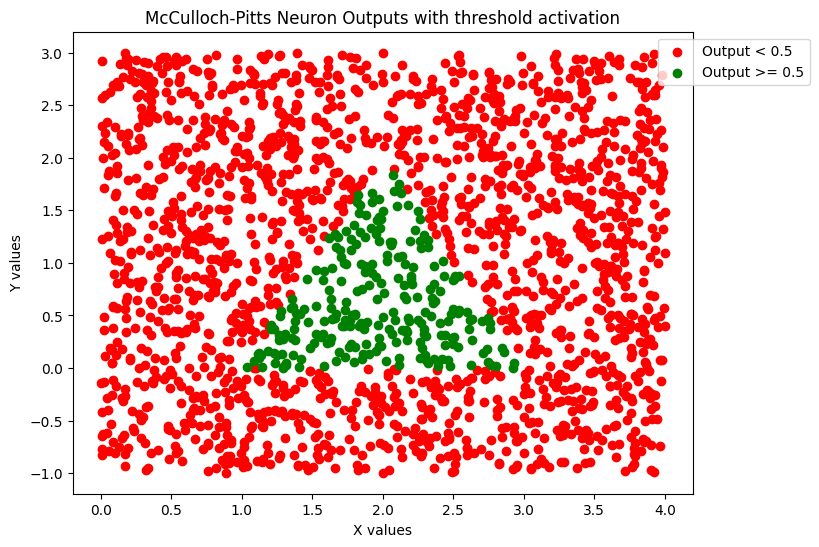

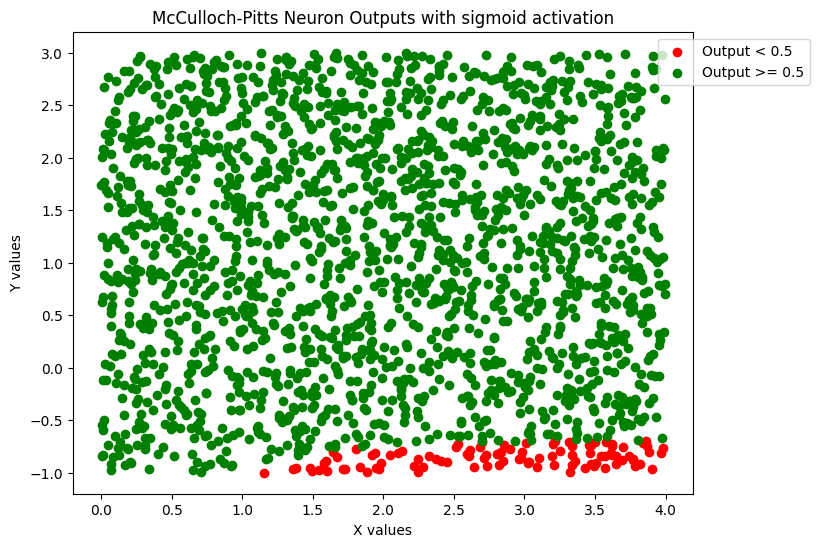

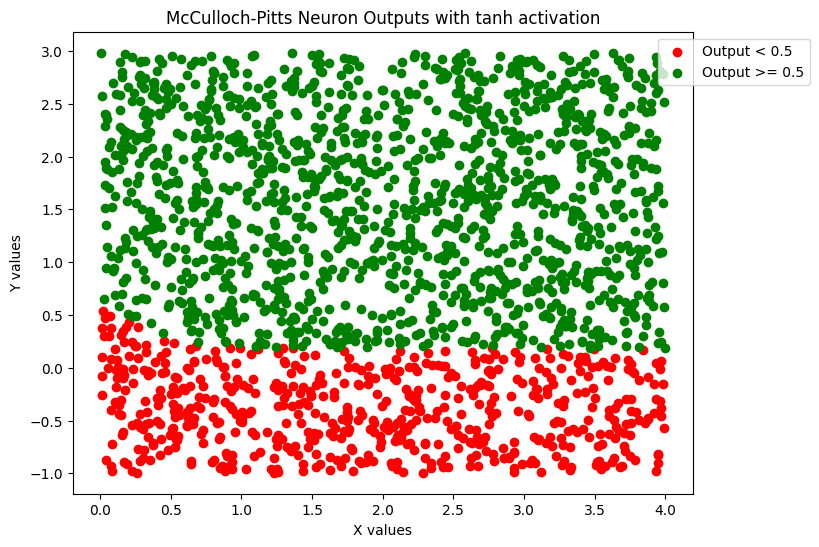

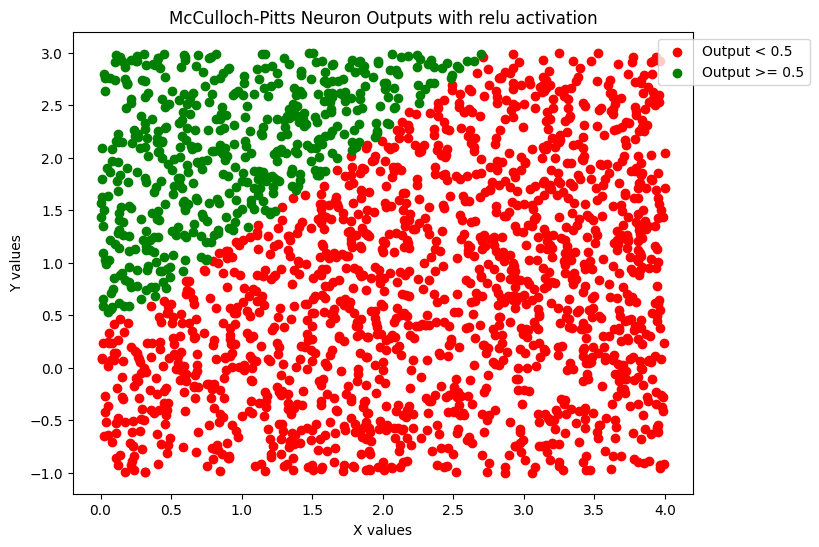

In [6]:
def classify_and_plot(activation):
    num_points = 2000
    x_values = np.random.uniform(0, 4, num_points)
    y_values = np.random.uniform(-1, 3, num_points)

    red_points = []
    green_points = []

    for i in range(num_points):
        z4_value = Area(x_values[i], y_values[i], activation=activation)
        if z4_value < 0.5:
            red_points.append((x_values[i], y_values[i]))
        else:
            green_points.append((x_values[i], y_values[i]))

    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    plt.figure(figsize=(8, 6))
    plt.scatter(red_x, red_y, color='red', label='Output < 0.5')
    plt.scatter(green_x, green_y, color='green', label='Output >= 0.5')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'McCulloch-Pitts Neuron Outputs with {activation} activation')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()

classify_and_plot('threshold')
classify_and_plot('sigmoid')
classify_and_plot('tanh')
classify_and_plot('relu')
